In [0]:
import pandas as pd

import numpy as np

import scipy as sp

import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import cross_val_score,KFold
#Leave-One-Out cross-validator(LOOCV)
from sklearn import model_selection,linear_model

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [0]:
data=pd.read_csv('insurancee.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
'''


"\nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndata['sex']=le.fit_transform(data['sex'])\n"

In [8]:
'''
data['sex']
'''

"\ndata['sex']\n"

In [9]:
'''
data['smoker']=le.fit_transform(data['smoker'])
'''

"\ndata['smoker']=le.fit_transform(data['smoker'])\n"

In [10]:
'''
data['smoker']
'''

"\ndata['smoker']\n"

In [11]:
'''
data.iloc[0:,0:]
'''

'\ndata.iloc[0:,0:]\n'

In [0]:
def map_smoking(column):
  mapped=[]
  for row in column:        
      if row=="yes":
          mapped.append(1)
      else:
          mapped.append(0)  
  return mapped
data["smoker_norm"]=map_smoking(data["smoker"])

In [13]:
data['smoker_norm']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_norm, Length: 1338, dtype: int64

In [0]:
nonnum_cols=[col for col in data.select_dtypes(include=["object"])]

In [16]:
nonnum_cols

['sex', 'smoker', 'region']

In [0]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
data["obese"]=map_obese(data["bmi"])

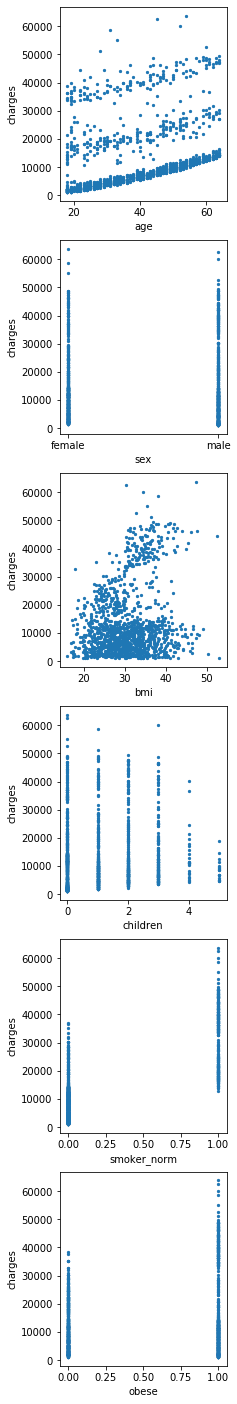

In [18]:
colnum=len(data.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in data.columns if i not in ["smoker","region","charges","sex_norm"]]):  
    ax[ind].scatter(data[col],data.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

age :  0.2990081933306476
bmi :  0.1983409688336288
children :  0.0679982268479048
charges :  1.0
smoker_norm :  0.7872514304984775
obese :  0.19968322199588243


Text(0, 0.5, 'Absolute correlation')

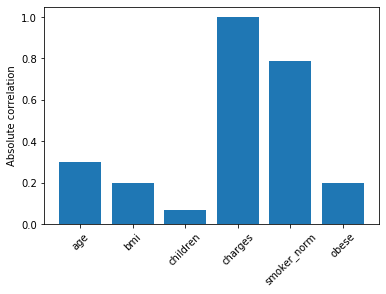

In [19]:
corr_vals=[]
collabel=[]
for col in [i for i in data.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(data[col],data["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

In [0]:
cols_not_reg3=['age', 'obese', 'smoker_norm']

In [0]:
kf=KFold(n_splits=10, random_state=1, shuffle=True)
intercepts=[]
mses=[]
coefs=[]

for train_index, test_index in kf.split(data[cols_not_reg3]):
    
    lr=linear_model.LinearRegression()
    lr.fit(data[cols_not_reg3].iloc[train_index],data["charges"].iloc[train_index])
    lr_predictions=lr.predict(data[cols_not_reg3].iloc[test_index])
    
    lr_mse=mean_squared_error(data["charges"].iloc[test_index],lr_predictions)
    
    intercepts.append(lr.intercept_)
    
    coefs.append(lr.coef_)
    mses.append(lr_mse)

In [22]:
rmses=[x**.5 for x in mses]#root mean square error
avg_rmse=np.mean(rmses)
avg_intercept=np.mean(intercepts)
age_coefs=[]
obesity_coefs=[]
smoking_coefs=[]
for vals in coefs:
    #print vals[0]
    age_coefs.append(vals[0])
    obesity_coefs.append(vals[1])
    smoking_coefs.append(vals[2])
age_coef=np.mean(age_coefs)
obesity_coef=np.mean(obesity_coefs)
smoking_coef=np.mean(smoking_coefs)
print("a: ",age_coef," b: ",obesity_coef," c: ",smoking_coef," intercept: ",avg_intercept)

a:  261.83801848327676  b:  4227.7376009403615  c:  23851.06705386572  intercept:  -4107.422133255812


In [0]:
def calculate_insurance(age,obesity,smoking):
    y=(age_coef*age)+(obesity_coef*obesity)+(smoking_coef*smoking)+avg_intercept
    return y

In [25]:
print(calculate_insurance(19,18.5,1))

102931.71288918887
